In [1]:
# 匯入 Keras 模組
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# -----------------------------
# 建立序列式模型 (Sequential Model)
# -----------------------------
model = Sequential()

# -----------------------------
# 第一層卷積層 (Conv2D)
# -----------------------------
# - filters=16: 使用 16 個卷積核 (feature map)
# - kernel_size=(5,5): 卷積核大小為 5x5
# - input_shape=(28,28,1): 輸入形狀為 28x28 灰階圖像，最後一維 1 表示單通道
# - activation='relu': 使用 ReLU 激活函數增加非線性
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))

# -----------------------------
# 最大池化層 (MaxPooling2D)
# -----------------------------
# - pool_size=(2,2): 對每個 2x2 的區塊取最大值
# 作用：降維、減少運算量、保留重要特徵
model.add(MaxPooling2D(pool_size=(2, 2)))

# -----------------------------
# 可以加第二層卷積層 (目前註解掉)
# -----------------------------
# model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# -----------------------------
# Flatten 層
# -----------------------------
# 將卷積層的輸出攤平成一維向量，方便接入全連接層
model.add(Flatten())

# -----------------------------
# 輸出層 (全連接層)
# -----------------------------
# - 10 個神經元 (對應 10 個類別)
# - activation='softmax': 多分類問題常用，輸出為機率分布
model.add(Dense(10, activation='softmax'))

# -----------------------------
# 顯示模型摘要
# -----------------------------
# 可以看到每層輸入輸出形狀以及參數數量
model.summary()

# -----------------------------
# 編譯模型
# -----------------------------
# - optimizer='rmsprop': 優化器
# - loss='categorical_crossentropy': 多分類損失函數 (one-hot 標籤)
# - metrics=['accuracy']: 評估指標為準確率
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,466 (91.66 KB)

 Trainable params: 23,466 (91.66 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
# 匯入 MNIST 手寫數字資料集
mnist = keras.datasets.mnist

# -----------------------------
# 載入資料
# -----------------------------
# MNIST 資料集已經分好訓練集和測試集
# - train_data / train_label: 訓練資料和標籤
# - test_data / test_label: 測試資料和標籤
(train_data, train_label), (test_data, test_label) = mnist.load_data()

# -----------------------------
# 保留原始測試標籤，用於後續分析（例如交叉表分析）
# -----------------------------
test_label_original = test_label  # 保存原始整數標籤

# -----------------------------
# 將標籤轉換成 one-hot 編碼
# -----------------------------
# - keras.utils.to_categorical 將整數標籤轉為 one-hot 向量
#   例如數字 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# -----------------------------
# 訓練 CNN 模型
# -----------------------------
# model.fit() 用於訓練模型
# 參數說明：
# - train_data: 訓練資料 (輸入特徵)，形狀為 (60000, 28, 28) 或 (60000, 28, 28, 1)
# - train_label: 訓練標籤 (one-hot 編碼)，形狀為 (60000, 10)
# - epochs=10: 訓練完整資料集 10 次
# - batch_size=512: 每次梯度更新使用 512 筆資料
# 返回值 train_history 可用來查看訓練過程中的 loss 與 accuracy
train_history = model.fit(train_data, train_label, epochs=10, batch_size=512)


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - accuracy: 0.6624 - loss: 14.5582
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.9401 - loss: 0.5084
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.9676 - loss: 0.1607
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - accuracy: 0.9785 - loss: 0.0898
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - accuracy: 0.9854 - loss: 0.0549
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 160ms/step - accuracy: 0.9874 - loss: 0.0412
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - accuracy: 0.9923 - loss: 0.0270
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - accuracy: 0.9928 - loss: 0.0229
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - accuracy: 0.9939 - loss: 0.0196
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 160ms/step - accuracy: 0.9954 - loss: 0.0149


In [4]:
# -----------------------------
# 評估模型在測試集上的表現
# -----------------------------
# model.evaluate() 會回傳 [loss, accuracy]（依 compile 設定的 metrics）
# - test_data: 測試資料 (輸入特徵)
# - test_label: 測試標籤 (one-hot 編碼)
score = model.evaluate(test_data, test_label)

# 印出模型在測試集上的準確率 (accuracy)
# score[0] → 測試集損失 (loss)
# score[1] → 測試集準確率 (accuracy)
print(score[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9745 - loss: 0.1430
0.9776999950408936


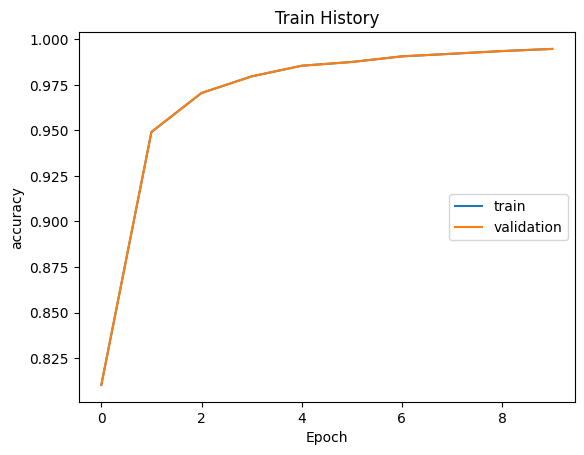

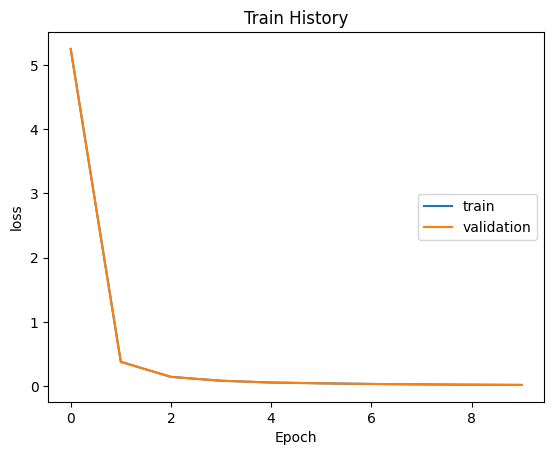

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,1,2,0,0,0,1,2,3,3
1,2,1112,4,1,2,0,1,3,10,0
2,1,2,1012,0,2,0,1,11,3,0
3,0,0,4,978,0,9,0,9,6,4
4,0,1,1,0,946,0,1,13,3,17
5,2,0,0,5,0,875,1,2,5,2
6,7,2,1,0,2,4,933,1,8,0
7,0,1,8,0,0,1,0,1012,3,3
8,4,0,6,0,0,2,0,3,957,2


In [5]:
# -----------------------------
# 繪製訓練過程中的準確率與損失歷史圖
# -----------------------------
import matplotlib.pyplot as plt
import numpy as np

# 定義函數：顯示訓練歷史圖
def show_train_history(train_history, train, validation):
    """
    train_history: model.fit() 返回的歷史物件
    train: 訓練集指標名稱，例如 'accuracy' 或 'loss'
    validation: 驗證集指標名稱，例如 'val_accuracy' 或 'val_loss'
    """
    # 畫出訓練指標曲線
    plt.plot(train_history.history[train])
    # 畫出驗證指標曲線（若沒有驗證集，可以改成同訓練集比較）
    plt.plot(train_history.history[validation])
    plt.title('Train History')      # 標題
    plt.ylabel(train)               # y 軸標籤
    plt.xlabel('Epoch')             # x 軸標籤
    plt.legend(['train', 'validation'], loc='center right')  # 圖例
    plt.show()

# 繪製準確率曲線
show_train_history(train_history, 'accuracy', 'accuracy')

# 繪製損失曲線
show_train_history(train_history, 'loss', 'loss')


# -----------------------------
# Confusion Matrix 混淆矩陣
# -----------------------------
import pandas as pd

# 使用模型對測試集進行預測
prediction = model.predict(test_data)

# 將預測結果 (one-hot) 轉回數字標籤
prediction_label = np.argmax(prediction, axis=1)

# 檢查測試集標籤的形狀
print(test_label.shape)  # 例如 (10000, 10) 經 one-hot 編碼

# 產生混淆矩陣（交叉表）
# - rownames=['label']: 真實標籤
# - colnames=['predict']: 模型預測標籤
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])
